# Import the libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
df_binary = pd.read_csv(r'data/heart_cleveland_upload.csv')
df_multi = pd.read_csv(r'data/Iris.csv')

In [3]:
df_binary.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
df_multi.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [6]:
df_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
encoder = LabelEncoder()
df_multi['Species'] = encoder.fit_transform(df_multi['Species'])

# Train Test Split

In [8]:
X_binary = df_binary.drop('condition', axis=1)
y_binary = df_binary['condition']

X_multi = df_multi.drop('Species', axis=1)
y_multi = df_multi['Species']

In [9]:
X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

In [10]:
X_binary_train.shape, X_binary_test.shape, y_binary_train.shape, y_binary_test.shape

((237, 13), (60, 13), (237,), (60,))

In [11]:
X_multi_train.shape, X_multi_test.shape, y_multi_train.shape, y_multi_test.shape

((120, 5), (30, 5), (120,), (30,))

# Logistic Regression

In [12]:
lor_binary = LogisticRegression()
lor_multi = LogisticRegression()

## Fit the model

In [13]:
lor_binary.fit(X_binary_train, y_binary_train)

LogisticRegression()

In [14]:
lor_multi.fit(X_multi_train, y_multi_train)

LogisticRegression()

# Decisison Tree

In [15]:
dt_binary = DecisionTreeClassifier()
dt_multi = DecisionTreeClassifier()

## Fit the model

In [16]:
dt_binary.fit(X_binary_train, y_binary_train)

DecisionTreeClassifier()

In [17]:
dt_multi.fit(X_multi_train, y_multi_train)

DecisionTreeClassifier()

# Accuracy Score

In [18]:
y_pred_lor_binary = lor_binary.predict(X_binary_test)
y_pred_lor_multi = lor_multi.predict(X_multi_test)

y_pred_dt_binary = dt_binary.predict(X_binary_test)
y_pred_dt_multi = dt_multi.predict(X_multi_test)

print(f'Accuracy of Logistic Regression model for Binary Class Classification is: ', accuracy_score(y_binary_test, y_pred_lor_binary))
print(f'Accuracy of Logistic Regression model for Multi Class Classification is: ', accuracy_score(y_multi_test, y_pred_lor_multi))

print(f'Accuracy of Decision Tree Classfier model Binary Class Classification is: ', accuracy_score(y_binary_test, y_pred_dt_binary))
print(f'Accuracy of Decision Tree Classfier model Multi Class Classification is: ', accuracy_score(y_multi_test, y_pred_dt_multi))

Accuracy of Logistic Regression model for Binary Class Classification is:  0.75
Accuracy of Logistic Regression model for Multi Class Classification is:  1.0
Accuracy of Decision Tree Classfier model Binary Class Classification is:  0.7166666666666667
Accuracy of Decision Tree Classfier model Multi Class Classification is:  1.0


# Confusion Matrix

In [19]:
print(f'Confusion Matrix of Logistic Regression model for Binary Class Classification is: \n', confusion_matrix(y_binary_test, y_pred_lor_binary))
print('\n')
print(f'Confusion Matrix of Logistic Regression model for Multi Class Classification is: \n', confusion_matrix(y_multi_test, y_pred_lor_multi))
print('\n')

print(f'Confusion Matrix of Decision Tree Classifier model for Binary Class Classification is: \n', confusion_matrix(y_binary_test, y_pred_dt_binary))
print('\n')
print(f'Confusion Matrix of Decision Tree Classifier model for Multi Class Classification is: \n', confusion_matrix(y_multi_test, y_pred_dt_multi))

Confusion Matrix of Logistic Regression model for Binary Class Classification is: 
 [[23  9]
 [ 6 22]]


Confusion Matrix of Logistic Regression model for Multi Class Classification is: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Confusion Matrix of Decision Tree Classifier model for Binary Class Classification is: 
 [[21 11]
 [ 6 22]]


Confusion Matrix of Decision Tree Classifier model for Multi Class Classification is: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


* Diagonal Elements denote Correct Predictions (True Positives/True Negatives)

## Confusion Matrix Display

### Logistic Regression

#### Binary Class

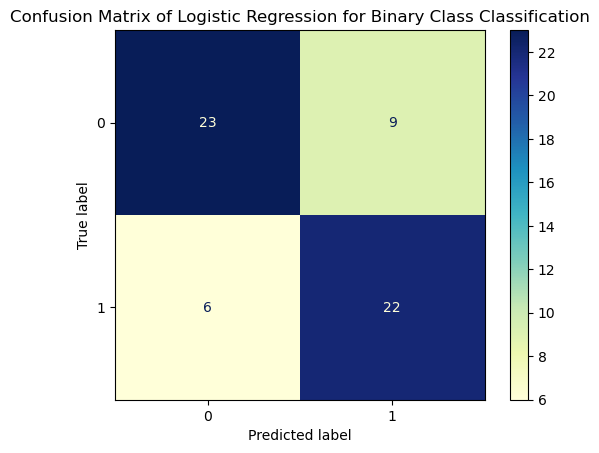

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_binary_test, y_pred_lor_binary), display_labels=lor_binary.classes_)
disp.plot(cmap="YlGnBu")
plt.title("Confusion Matrix of Logistic Regression for Binary Class Classification")
plt.show()

#### Multi Class

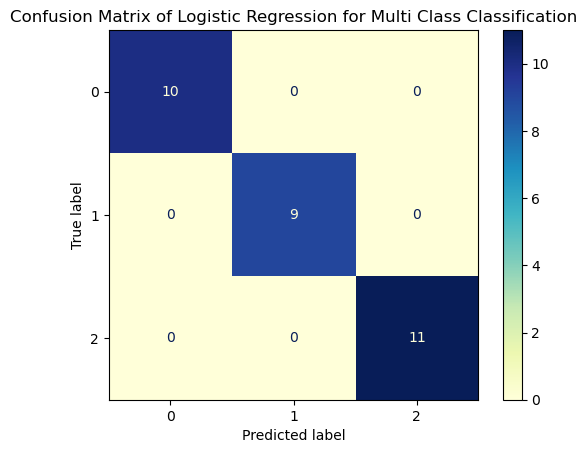

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_multi_test, y_pred_lor_multi), display_labels=lor_multi.classes_)
disp.plot(cmap="YlGnBu")
plt.title("Confusion Matrix of Logistic Regression for Multi Class Classification")
plt.show()

### Decision Tree Classifier

#### Binary Class

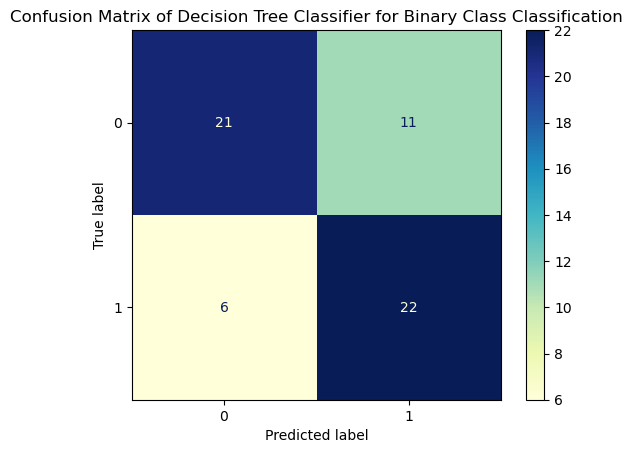

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_binary_test, y_pred_dt_binary), display_labels=dt_binary.classes_)
disp.plot(cmap="YlGnBu")
plt.title("Confusion Matrix of Decision Tree Classifier for Binary Class Classification")
plt.show()

#### Multi Class

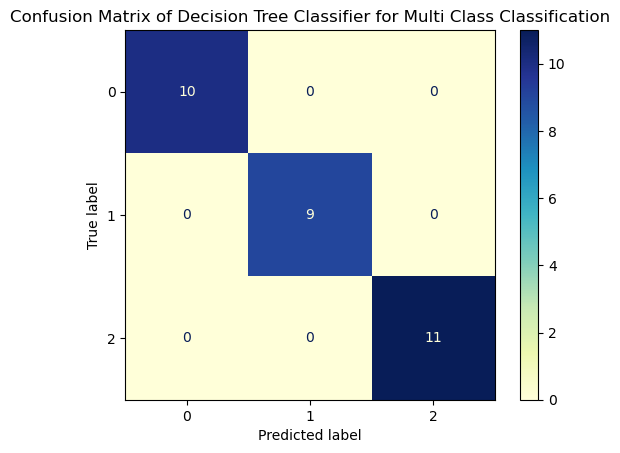

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_multi_test, y_pred_dt_multi), display_labels=dt_multi.classes_)
disp.plot(cmap="YlGnBu")
plt.title("Confusion Matrix of Decision Tree Classifier for Multi Class Classification")
plt.show()

# Precision, Recall and F1 Score

## Logistic Regression

### Binary

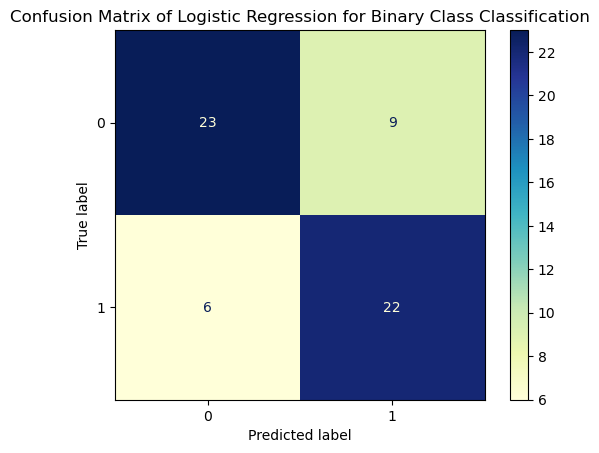

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_binary_test, y_pred_lor_binary), display_labels=lor_binary.classes_)
disp.plot(cmap="YlGnBu")
plt.title("Confusion Matrix of Logistic Regression for Binary Class Classification")
plt.show()

In [25]:
print(f'Precision Score of Logistic Regression model for Binary Class Classification is: ', precision_score(y_binary_test, y_pred_lor_binary))
print(f'Recall Score of Logistic Regression model for Binary Class Classification is: ', recall_score(y_binary_test, y_pred_lor_binary))
print(f'F1 Score of Logistic Regression model for Binary Class Classification is: ', f1_score(y_binary_test, y_pred_lor_binary))

Precision Score of Logistic Regression model for Binary Class Classification is:  0.7096774193548387
Recall Score of Logistic Regression model for Binary Class Classification is:  0.7857142857142857
F1 Score of Logistic Regression model for Binary Class Classification is:  0.7457627118644068


In [26]:
print(f'Precision Score(s) of Logistic Regression model for Binary Class Classification is: ', precision_score(y_binary_test, y_pred_lor_binary, average=None))
print(f'Recall Score(s) of Logistic Regression model for Binary Class Classification is: ', recall_score(y_binary_test, y_pred_lor_binary, average=None))
print(f'F1 Score(s) of Logistic Regression model for Binary Class Classification is: ', f1_score(y_binary_test, y_pred_lor_binary, average=None))

Precision Score(s) of Logistic Regression model for Binary Class Classification is:  [0.79310345 0.70967742]
Recall Score(s) of Logistic Regression model for Binary Class Classification is:  [0.71875    0.78571429]
F1 Score(s) of Logistic Regression model for Binary Class Classification is:  [0.75409836 0.74576271]


[for_class_0, for_class_1]

### Multi

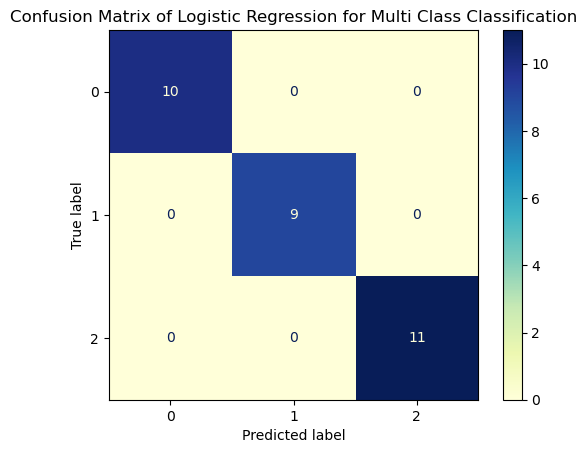

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_multi_test, y_pred_lor_multi), display_labels=lor_multi.classes_)
disp.plot(cmap="YlGnBu")
plt.title("Confusion Matrix of Logistic Regression for Multi Class Classification")
plt.show()

In [37]:
print(f'Precision Score of Logistic Regression model for Multi Class Classification is: ', precision_score(y_multi_test, y_pred_lor_multi, average='macro'))
print(f'Recall Score of Logistic Regression model for Multi Class Classification is: ', recall_score(y_multi_test, y_pred_lor_multi, average='weighted'))
print(f'F1 Score of Logistic Regression model for Multi Class Classification is: ', f1_score(y_multi_test, y_pred_lor_multi, average=None))

Precision Score of Logistic Regression model for Multi Class Classification is:  1.0
Recall Score of Logistic Regression model for Multi Class Classification is:  1.0
F1 Score of Logistic Regression model for Multi Class Classification is:  [1. 1. 1.]


## Decision Tree

### Binary

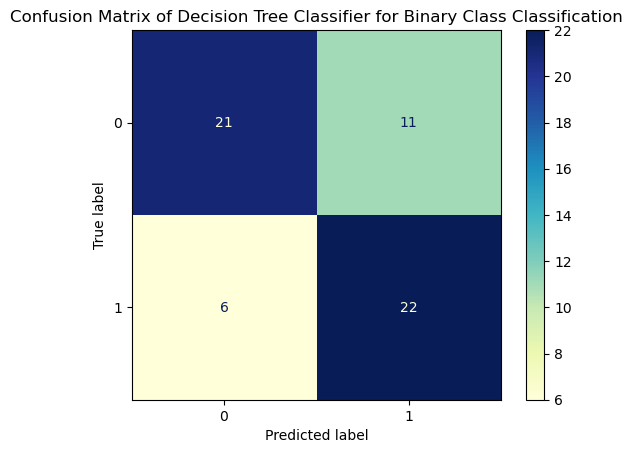

In [29]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_binary_test, y_pred_dt_binary), display_labels=dt_binary.classes_)
disp.plot(cmap="YlGnBu")
plt.title("Confusion Matrix of Decision Tree Classifier for Binary Class Classification")
plt.show()

In [30]:
print(f'Precision Score of Decision Tree Classifier model for Binary Class Classification is: ', precision_score(y_binary_test, y_pred_dt_binary))
print(f'Recall Score of Decision Tree Classifier model for Binary Class Classification is: ', recall_score(y_binary_test, y_pred_dt_binary))
print(f'F1 Score of Decision Tree Classifier model for Binary Class Classification is: ', f1_score(y_binary_test, y_pred_dt_binary))

Precision Score of Decision Tree Classifier model for Binary Class Classification is:  0.6666666666666666
Recall Score of Decision Tree Classifier model for Binary Class Classification is:  0.7857142857142857
F1 Score of Decision Tree Classifier model for Binary Class Classification is:  0.7213114754098361


In [31]:
print(f'Precision Score(s) of Decision Tree Classifier model for Binary Class Classification is: ', precision_score(y_binary_test, y_pred_dt_binary, average=None))
print(f'Recall Score(s) of Decision Tree Classifier model for Binary Class Classification is: ', recall_score(y_binary_test, y_pred_dt_binary, average=None))
print(f'F1 Score(s) of Decision Tree Classifier model for Binary Class Classification is: ', f1_score(y_binary_test, y_pred_dt_binary, average=None))

Precision Score(s) of Decision Tree Classifier model for Binary Class Classification is:  [0.77777778 0.66666667]
Recall Score(s) of Decision Tree Classifier model for Binary Class Classification is:  [0.65625    0.78571429]
F1 Score(s) of Decision Tree Classifier model for Binary Class Classification is:  [0.71186441 0.72131148]


[for_class_0, for_class_1]

### Multi

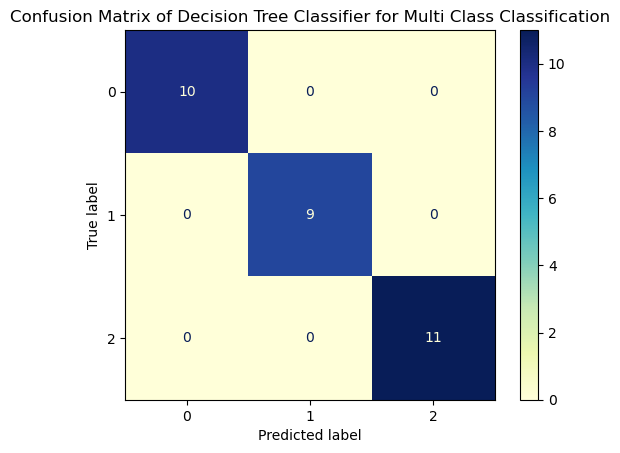

In [38]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_multi_test, y_pred_dt_multi), display_labels=dt_multi.classes_)
disp.plot(cmap="YlGnBu")
plt.title("Confusion Matrix of Decision Tree Classifier for Multi Class Classification")
plt.show()

In [39]:
print(f'Precision Score of Decision Tree Classifier model for Multi Class Classification is: ', precision_score(y_multi_test, y_pred_dt_multi, average='macro'))
print(f'Recall Score of Deffcision Tree Classifier model for Multi Class Classification is: ', recall_score(y_multi_test, y_pred_dt_multi, average='weighted'))
print(f'F1 Score of Decision Tree Classifier model for Multi Class Classification is: ', f1_score(y_multi_test, y_pred_dt_multi, average=None))

Precision Score of Decision Tree Classifier model for Multi Class Classification is:  1.0
Recall Score of Deffcision Tree Classifier model for Multi Class Classification is:  1.0
F1 Score of Decision Tree Classifier model for Multi Class Classification is:  [1. 1. 1.]


# Classification Report

## Logistic Regression

### Binary

In [44]:
print('Classification Report for Logistic Regression model for Binary Class Classification\n')
print(classification_report(y_binary_test, y_pred_lor_binary))

Classification Report for Logistic Regression model for Binary Class Classification

              precision    recall  f1-score   support

           0       0.79      0.72      0.75        32
           1       0.71      0.79      0.75        28

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



### Multi

In [45]:
print('Classification Report for Logistic Regression model for Multi Class Classification\n')
print(classification_report(y_multi_test, y_pred_lor_multi))

Classification Report for Logistic Regression model for Multi Class Classification

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Decision Tree

### Binary

In [47]:
print('Classification Report for Decision Tree Classifier model for Binary Class Classification\n')
print(classification_report(y_binary_test, y_pred_dt_binary))

Classification Report for Decision Tree Classifier model for Binary Class Classification

              precision    recall  f1-score   support

           0       0.78      0.66      0.71        32
           1       0.67      0.79      0.72        28

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.73      0.72      0.72        60



### Multi

In [48]:
print('Classification Report for Decision Tree Classifier model for Multi Class Classification\n')
print(classification_report(y_multi_test, y_pred_dt_multi))

Classification Report for Decision Tree Classifier model for Multi Class Classification

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

